In [190]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [191]:
# Read the dataset
df=pd.read_csv("apple_products (1).csv")

Data Pre Processing Started

In [192]:
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [193]:
df.shape

(62, 11)

In [194]:
df.columns

Index(['Product Name', 'Product URL', 'Brand', 'Sale Price', 'Mrp',
       'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Upc',
       'Star Rating', 'Ram'],
      dtype='object')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


In [196]:
# removing unnecessary columns
data_to_drop=["Product URL","Brand","Ram","Upc"]
df.drop(data_to_drop,axis=1,inplace=True)

In [197]:
df.head()

,Product Name,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",49900,49900,0,3431,356,4.6
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",84900,84900,0,3431,356,4.6
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",84900,84900,0,3431,356,4.6
3,"APPLE iPhone 8 (Silver, 256 GB)",77000,77000,0,11202,794,4.5
4,"APPLE iPhone 8 (Gold, 256 GB)",77000,77000,0,11202,794,4.5


In [198]:
df.tail()

,Product Name,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
57,"APPLE iPhone SE (Black, 64 GB)",29999,39900,24,95909,8161,4.5
58,"APPLE iPhone 11 (Purple, 64 GB)",46999,54900,14,43470,3331,4.6
59,"APPLE iPhone 11 (White, 64 GB)",46999,54900,14,43470,3331,4.6
60,"APPLE iPhone 11 (Black, 64 GB)",46999,54900,14,43470,3331,4.6
61,"APPLE iPhone 11 (Red, 64 GB)",46999,54900,14,43470,3331,4.6


In [199]:
df.isnull().sum()

Product Name           0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Star Rating            0
dtype: int64

In [200]:
df.duplicated().sum()

0

In [201]:
df.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


After finishing data cleaning lets start to solve the questions .....

QUES 1) What are the top 10 highest rated iphones on Flipkart in India ?

In [202]:
df.head()

,Product Name,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",49900,49900,0,3431,356,4.6
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",84900,84900,0,3431,356,4.6
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",84900,84900,0,3431,356,4.6
3,"APPLE iPhone 8 (Silver, 256 GB)",77000,77000,0,11202,794,4.5
4,"APPLE iPhone 8 (Gold, 256 GB)",77000,77000,0,11202,794,4.5


In [203]:
top_rated = df.sort_values(by="Star Rating", ascending=False)
top_rated=top_rated.head(10)

In [204]:
# Top 10 Highest Rated IPhone
print(top_rated["Product Name"])

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object


Ques 2) How Many Rating do the highest rated iphones on flipkart have ?

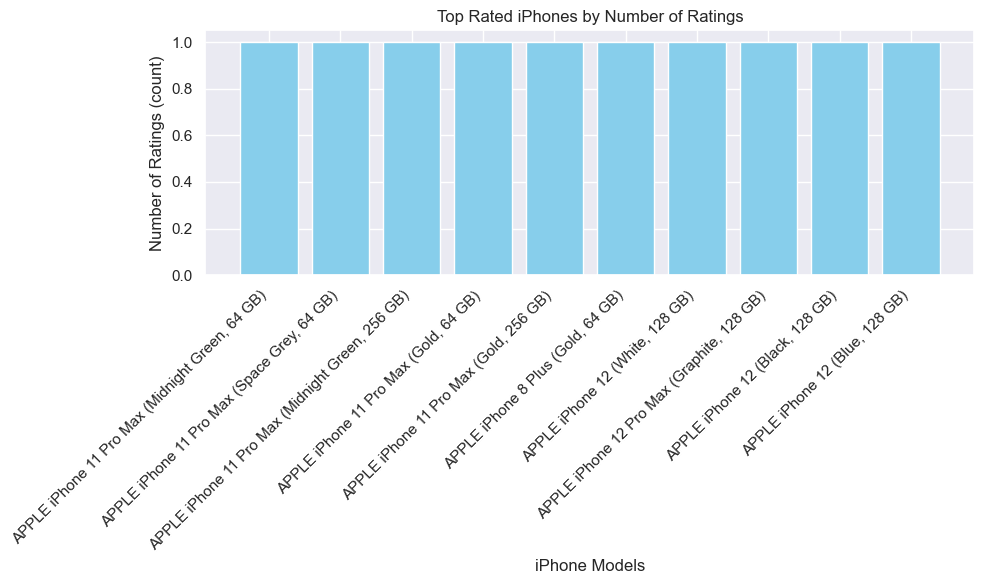

In [205]:
iphones = top_rated["Product Name"].value_counts()
labels = iphones.index
counts = iphones.values

plt.figure(figsize=(10,6))
plt.bar(labels, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("iPhone Models")
plt.ylabel("Number of Ratings (count)")
plt.title("Top Rated iPhones by Number of Ratings")
plt.tight_layout()
plt.show()

Ques3) What is the relationship between the sale price of iphones and the number of ratings on flipkart?

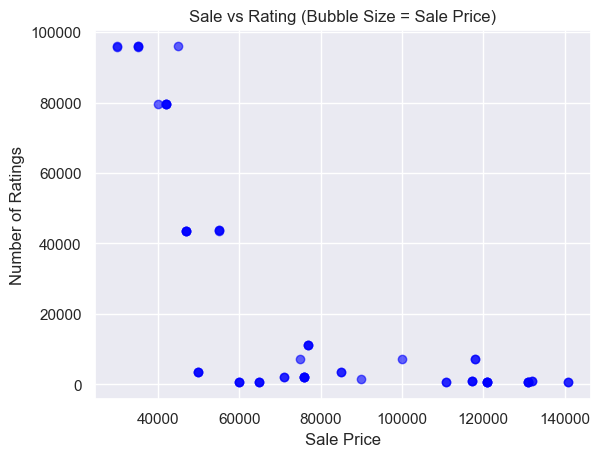

In [206]:

plt.scatter(df["Sale Price"], df["Number Of Ratings"],alpha=0.6,c='blue')
plt.xlabel("Sale Price")
plt.ylabel("Number of Ratings")
plt.title("Sale vs Rating (Bubble Size = Sale Price)")
plt.grid(True)
plt.show()

QUES 4)What is the relationship between the discount percentage of iphones and the number of ratings on flipkart?

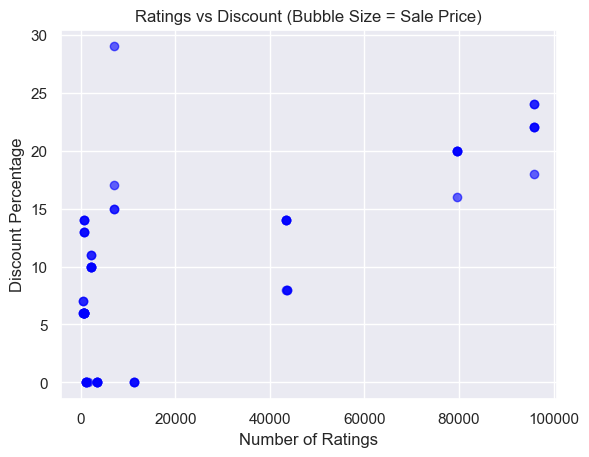

In [207]:

plt.scatter(df["Number Of Ratings"], df["Discount Percentage"], alpha=0.6,c='blue')
plt.xlabel("Number of Ratings")
plt.ylabel("Discount Percentage")
plt.title("Ratings vs Discount (Bubble Size = Sale Price)")
plt.grid(True)
plt.show()


Ques 5 ) Can You figure out the least expensive and the most expensive iphones in the indian market, along with all their specifications ?

In [208]:
print(df.loc[df["Sale Price"].idxmax()])
print(df.loc[df["Sale Price"].idxmin()])

Product Name           APPLE iPhone 12 Pro (Silver, 512 GB)
Sale Price                                           140900
Mrp                                                  149900
Discount Percentage                                       6
Number Of Ratings                                       542
Number Of Reviews                                        42
Star Rating                                             4.5
Name: 24, dtype: object
Product Name           APPLE iPhone SE (White, 64 GB)
Sale Price                                      29999
Mrp                                             39900
Discount Percentage                                24
Number Of Ratings                               95807
Number Of Reviews                                8154
Star Rating                                       4.5
Name: 52, dtype: object
